In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv("/content/SUV_Purchase.csv")
#Dropping User ID 
df.drop('User ID', inplace=True, axis=1)
df.head()


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


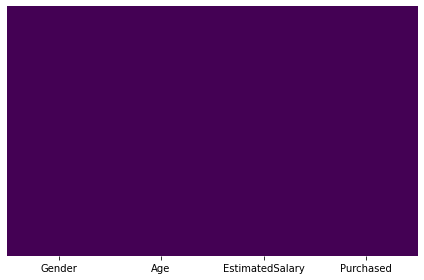

In [43]:
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')
  plt.tight_layout()
  return plt.show()

get_heatmap(df)

In [58]:

#importing standard scalar from scikit-learn
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()

#standardzing the xdata apat from the class column
data_scaled=df.iloc[:,:-1].values

data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)


In [59]:
from matplotlib.axis import YTick

#method 2 to load the data in the form of arrays -by library numpy

import numpy as np

x1=np.array(df[['Gender','EstimatedSalary','Age']])

y=np.array(df[['Purchased']])

In [60]:
'''x1=np.array(df[['Gender']])
x2=np.array(df[['Age']])
x3=np.array(df[['EstimatedSalary']])
y=np.array(df[['Purchased']])'''

"x1=np.array(df[['Gender']])\nx2=np.array(df[['Age']])\nx3=np.array(df[['EstimatedSalary']])\ny=np.array(df[['Purchased']])"

In [61]:
x=np.concatenate([x1,x2,x3],axis=1)
x
#if axis=0 each attributre get stored in a single column
#if axis=0 each attributre get stored in a single list

array([[    1, 19000,    19,    19, 19000],
       [    1, 20000,    35,    35, 20000],
       [    0, 43000,    26,    26, 43000],
       ...,
       [    0, 20000,    50,    50, 20000],
       [    1, 33000,    36,    36, 33000],
       [    0, 36000,    49,    49, 36000]])

In [62]:
#data processing
from sklearn import preprocessing  

#labelencodingg
LE=preprocessing.LabelEncoder()
#fitting it to our dataset
df.Gender=LE.fit_transform(df.Gender)

In [63]:
#the dataset
#convert Gender's String value in binary
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


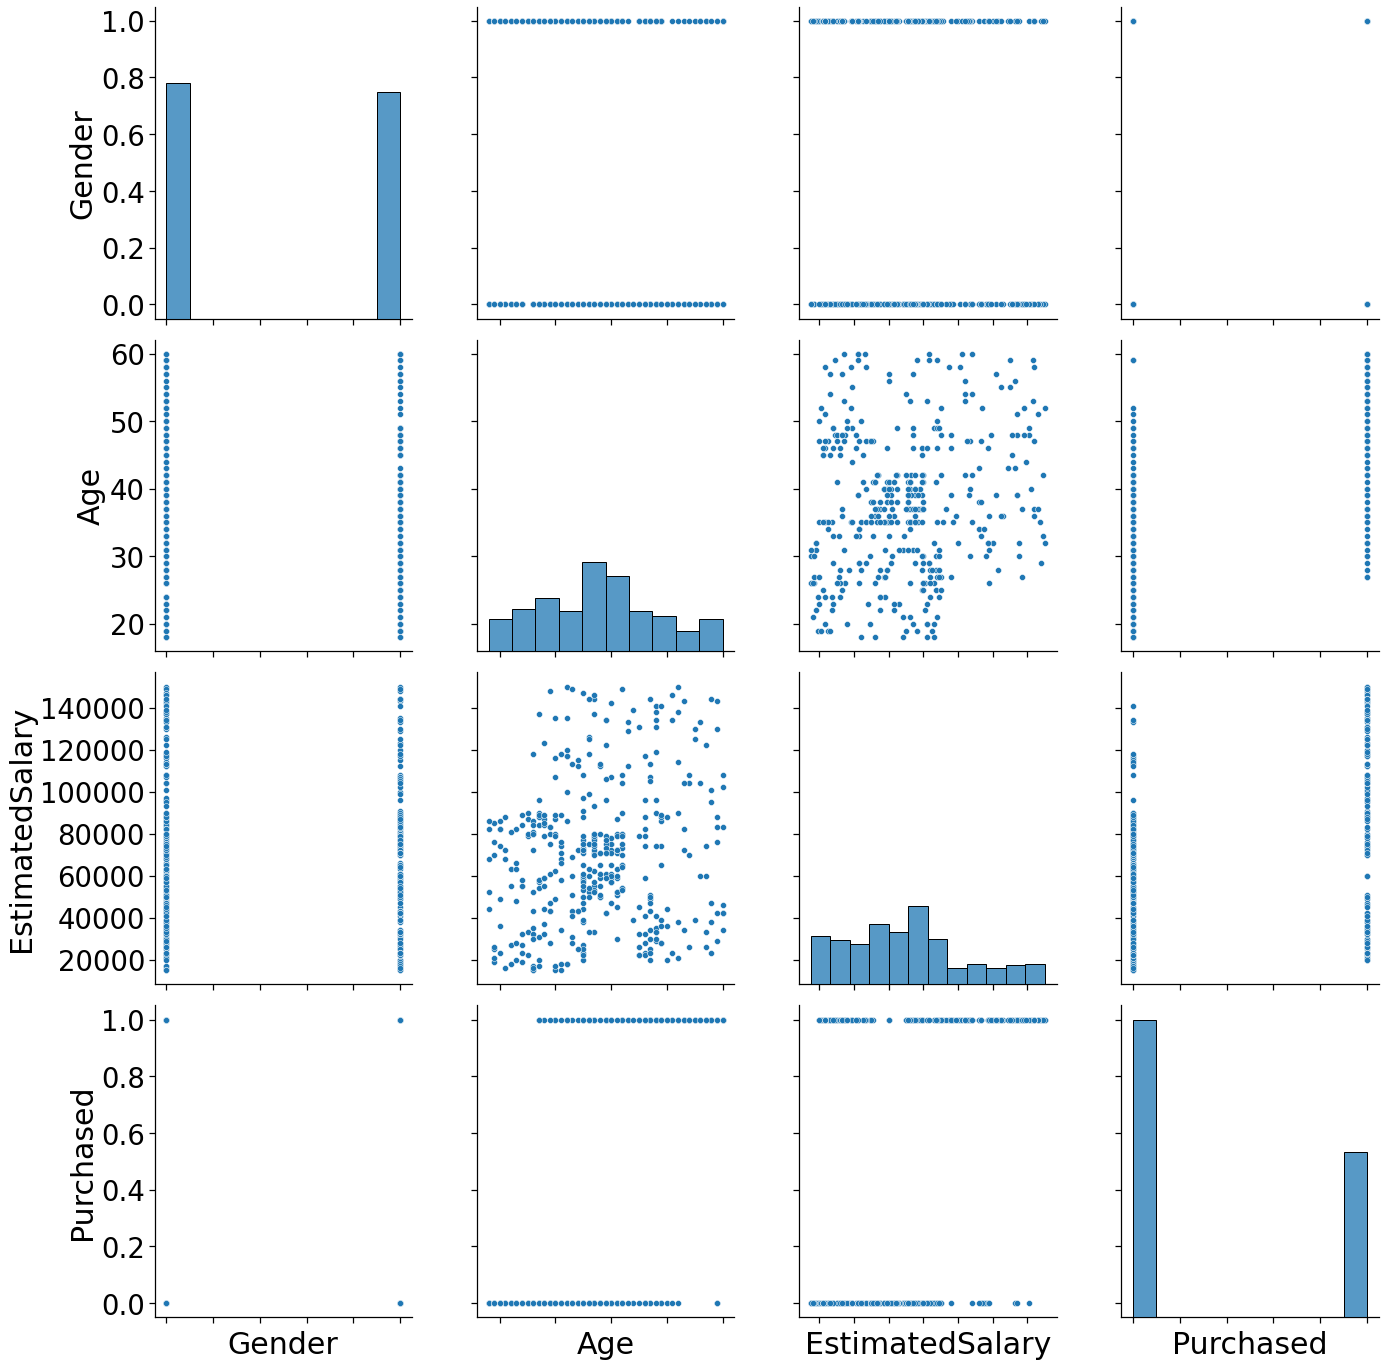

In [73]:
#understanding the distribution with seaborn 
import seaborn as sns
with sns.plotting_context("notebook",font_scale=2.5):
  g = sns.pairplot(df[['Gender','Age','EstimatedSalary','Purchased']],palette='tab20',size=5)
  g.set(xticklabels=[]);

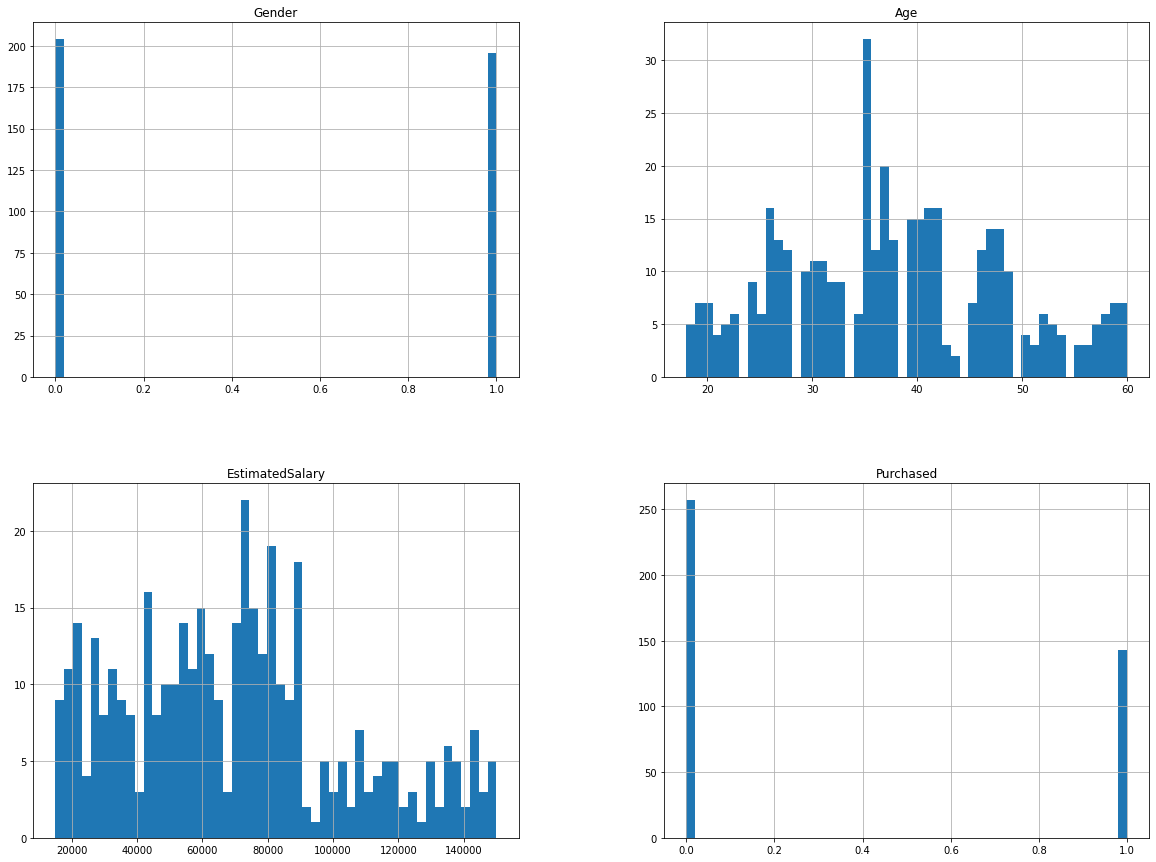

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

In [66]:
WIDTH  = 20
HEIGHT = 6

def plot_vs(frame, col1, col2, hue):
    plt.figure(figsize=(WIDTH, HEIGHT * 2))
    sns.scatterplot(data=frame, x=col1, y=col2, hue=hue)
    plt.title(f"Scatter plot | {col1} vs {col2}")
    plt.show()
    


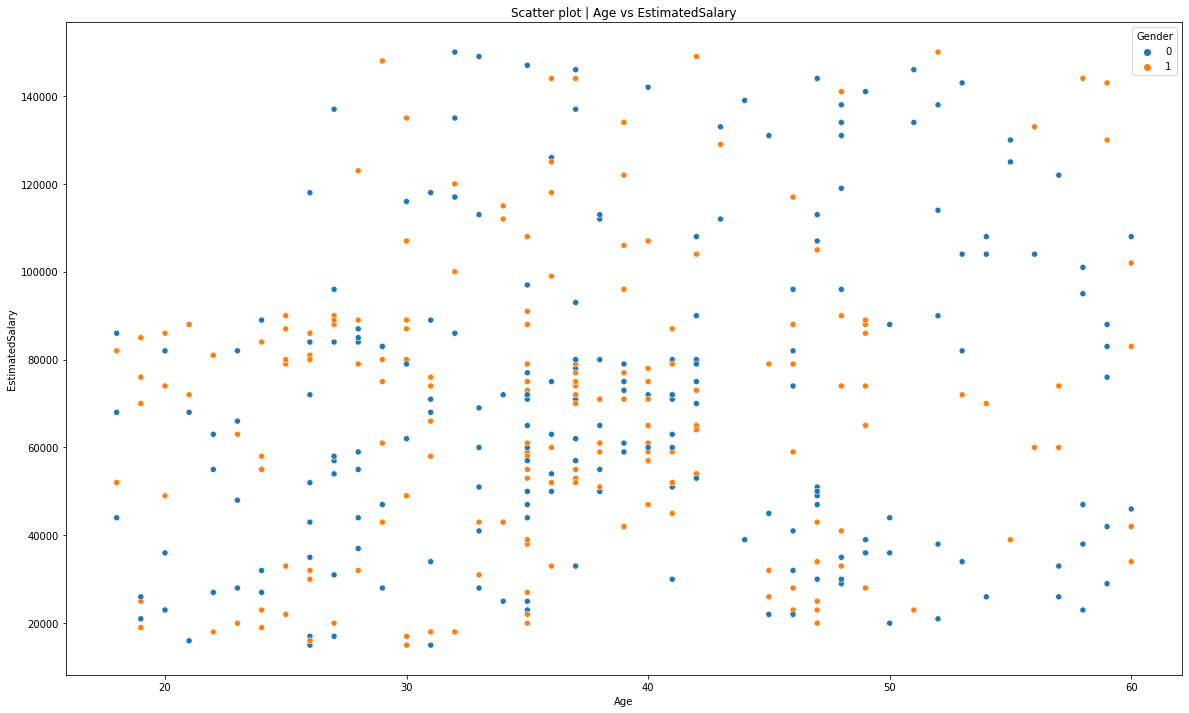

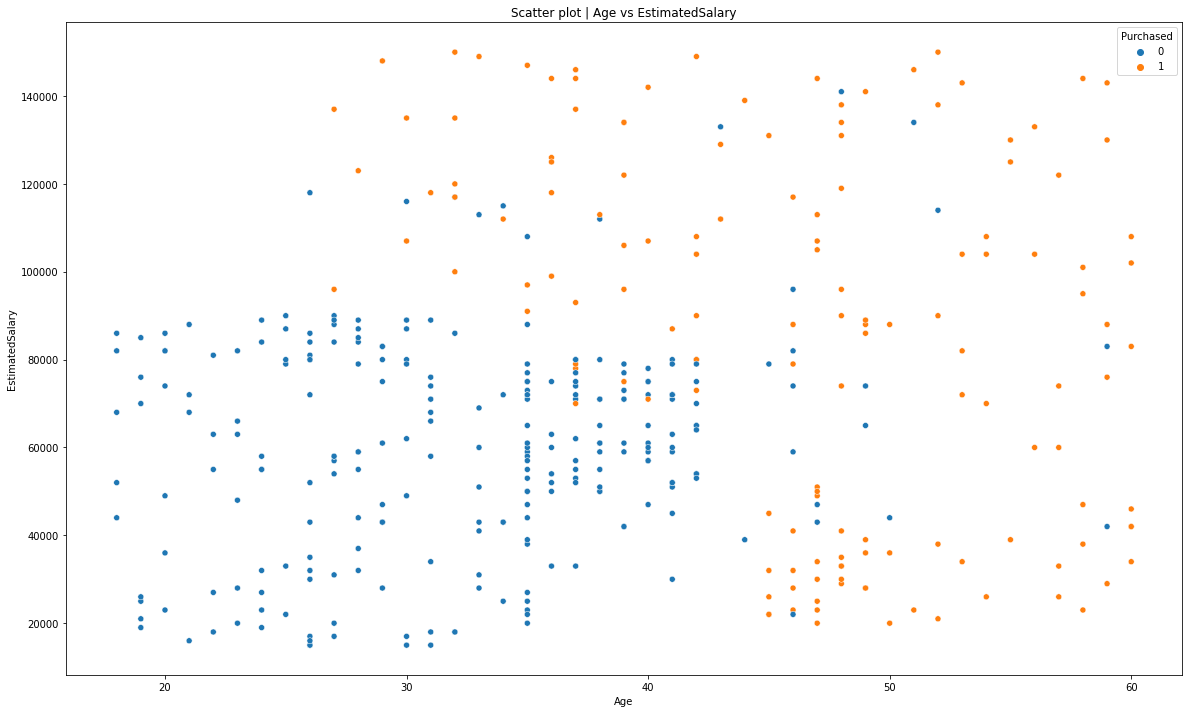

In [67]:
plot_vs(df,'Age', 'EstimatedSalary', 'Gender')
plot_vs( df,'Age', 'EstimatedSalary', 'Purchased')

In [68]:
#FROM GRAPH 2 OLD PEOPLE NO MATTER WHAT THEY BOUGHT THE CAR
#YOUTH ABOVE 80K SALARY BOUGHT THE CAR

In [69]:
#Splitting the dataset
#Splitting the dataset into Train & Test Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [70]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [71]:
print("Predicted value for training data:",model.score(x_train,y_train))
print("Training accuracy:",model.score(x_train,y_train)*100)

Predicted value for training data: 0.653125
Training accuracy: 65.3125


In [72]:
accuracy=model.score(x,y)*100
print(accuracy)

64.25
